## Dominik Adamczyk
### Mownit Lab1 rozwiązania

### Zadanie 
- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy kwadratowej przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

In [1]:
using LinearAlgebra, CSV, DataFrames

function my_dot(x, y)
    return dot(x, y)
end

function my_multiplication(x, y)
    return x * y
end


my_multiplication (generic function with 1 method)

In [2]:
v1 = [1, 2, 3]
v2 = [4, 5, 6]
my_dot(v1, v2)

32

In [3]:
m1 = [1 2; 3 4]
m2 = [1 1; 2 2]
my_multiplication(m1, m2)

2×2 Matrix{Int64}:
  5   5
 11  11

In [4]:
function singleDotMeasure(length)
    return @elapsed my_dot(rand(length), rand(length))
end

function singleMultiplicationMeasure(length)
    return @elapsed my_multiplication(rand(Float64, (length, length)), rand(length))
end

singleMultiplicationMeasure (generic function with 1 method)

In [5]:
function nDotMeasures(n, length, frameToFill)
    for i in 1:n
        push!(frameToFill,("Dot_Product", length, singleDotMeasure(length)))
    end
end

function nMultiplicationMeasures(n, length, frameToFill)
    for i in 1:n
        push!(frameToFill,("Mat_Mult", length, singleMultiplicationMeasure(length)))
    end
end

nMultiplicationMeasures (generic function with 1 method)

In [6]:
function fulltest(frameToFill, n, dotLengths, multLengths)
    for length in dotLengths
        nDotMeasures(n, length, frameToFill)
    end
    for length in multLengths
        nMultiplicationMeasures(n, length, frameToFill)
    end
end

fulltest (generic function with 1 method)

In [7]:
# Kod zawarty w tym bloku został wykonany dwa razy, aby wyeliminować
# dłuższy czas wykonania go spowodowany kompilacją Julii.
frame = DataFrame(Type=String[], Size=Int[], Time=Float64[])
multLengths = [x for x in 500:500:15000]
dotLengths = [x for x in 500000:500000:15000000]

fulltest(frame, 10, dotLengths, multLengths)

CSV.write("times.csv", frame)
frame


Row,Type,Size,Time
,String,Int64,Float64
1,Dot_Product,500000,0.0020225
2,Dot_Product,500000,0.002296
3,Dot_Product,500000,0.0124391
4,Dot_Product,500000,0.0020111
5,Dot_Product,500000,0.0022763
6,Dot_Product,500000,0.0025787
7,Dot_Product,500000,0.002224
8,Dot_Product,500000,0.0020219
9,Dot_Product,500000,0.0019061


In [8]:
using Statistics
my_data = CSV.read("times.csv", delim=",", DataFrame)

stats = combine(groupby(my_data, [:Type, :Size]), "Time" => mean, "Time" => std)

Row,Type,Size,Time_mean,Time_std
,String15,Int64,Float64,Float64
1,Dot_Product,500000,0.00420504,0.00430092
2,Dot_Product,1000000,0.0052526,0.00248123
3,Dot_Product,1500000,0.00809236,0.00202374
4,Dot_Product,2000000,0.00996234,0.00227705
5,Dot_Product,2500000,0.0134773,0.00301963
6,Dot_Product,3000000,0.0145361,0.0024887
7,Dot_Product,3500000,0.0189668,0.00319863
8,Dot_Product,4000000,0.0188541,0.00285401
9,Dot_Product,4500000,0.0218397,0.00254458



(process:15544): GLib-GIO-WARNING **: 14:28:48.118: Failed to open application manifest `C:\Windows\SystemApps\Microsoft.Windows.Search_cw5n1h2txyewy\AppxManifest.xml' for package #0 (`Microsoft.Windows.Search_1.16.0.22000_neutral_neutral_cw5n1h2txyewy'): error code 0x2


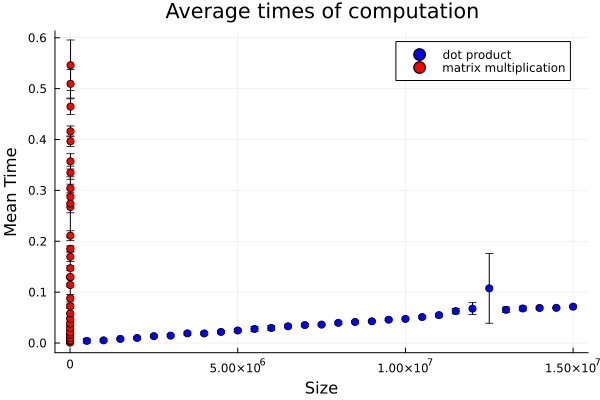

In [9]:
using Plots
scatter(stats.Size, stats.Time_mean, group = stats.Type, yerr=stats.Time_std,
        xlabel="Size", ylabel="Mean Time", title="Average times of computation",
        label=["dot product" "matrix multiplication"], color=[:blue :red])


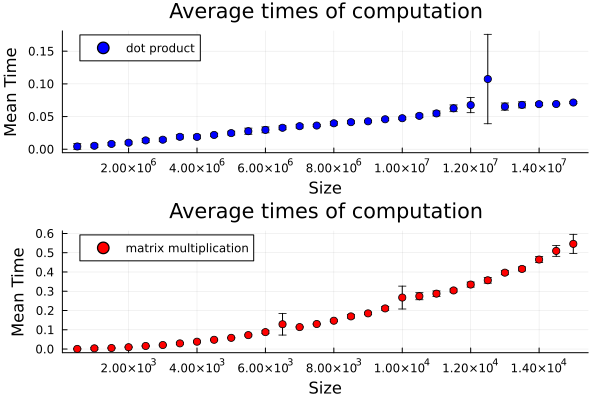

In [10]:
using Plots
using Plots
scatter(stats.Size, stats.Time_mean, group = stats.Type, yerr=stats.Time_std, xlabel="Size", ylabel="Mean Time", title="Average times of computation", layout=(2,1), label=["dot product" "matrix multiplication"], color=[:blue :red])

Powyższe wykresy w dobry sposób obrazują złożoność obliczeniową powyższych operacji - kolejno liniową i kwadratową